In [11]:
%run downloader.ipynb

In [12]:
import pandas as pd
import ta
import numpy as np
import seaborn as sns

import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from utils import windowed_dataset, split_sequences


In [13]:
info_data

,open,close,high,low,volume
date,,,,,
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569
1555372800,5027.4,5174.0,5192.3,5004.7,227.828122
1555459200,5173.8,5199.8,5227.5,5153.9,189.680810
1555545600,5200.0,5260.1,5285.0,5194.4,171.619350
...,...,...,...,...,...
1649376000,43441.1,42262.7,43976.1,42108.0,14012.935229
1649462400,42262.7,42753.4,42800.8,42123.0,3451.563365
1649548800,42753.5,42152.2,43415.6,41821.0,5185.381773


In [14]:
info_data.dtypes

open      float64
close     float64
high      float64
low       float64
volume    float64
dtype: object

In [15]:
#info_data = info_data.drop(columns = ["amount"])


In [16]:
info_data

,open,close,high,low,volume
date,,,,,
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569
1555372800,5027.4,5174.0,5192.3,5004.7,227.828122
1555459200,5173.8,5199.8,5227.5,5153.9,189.680810
1555545600,5200.0,5260.1,5285.0,5194.4,171.619350
...,...,...,...,...,...
1649376000,43441.1,42262.7,43976.1,42108.0,14012.935229
1649462400,42262.7,42753.4,42800.8,42123.0,3451.563365
1649548800,42753.5,42152.2,43415.6,41821.0,5185.381773


In [17]:
df = ta.utils.dropna(info_data)
print(df.columns)

Index(['open', 'close', 'high', 'low', 'volume'], dtype='object')


In [18]:
window = 5
df = ta.add_all_ta_features(df, "open", "high", "low", "close", "volume", fillna = True)

C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [19]:
df

,open,close,high,low,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
date,,,,,,,,,,,,,,,,,,,,,
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396,139.637691,176.232396,0.792350,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5133.700000,-79.845020,0.000000,0.000000
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569,72.748598,-83.546173,0.166850,-2.675719e+04,-1.424889e+09,...,-0.160289,-0.032058,-0.128231,3.653446,0.730689,2.922756,5070.067775,-2.006350,-2.026751,-2.006350
1555372800,5027.4,5174.0,5192.3,5004.7,227.828122,256.128377,144.281949,0.385829,-1.827077e+04,3.281360e+09,...,-0.060999,-0.037846,-0.023153,4.985099,1.581571,3.403528,5130.386958,2.848510,2.808694,0.785009
1555459200,5173.8,5199.8,5227.5,5153.9,189.680810,303.033142,333.962759,0.355039,-1.496155e+04,3.577547e+09,...,0.057465,-0.018784,0.076249,4.378659,2.140989,2.237670,5166.423379,0.498647,0.497408,1.287570
1555545600,5200.0,5260.1,5285.0,5194.4,171.619350,380.318678,505.582110,0.370992,-1.134581e+04,2.586771e+09,...,0.242816,0.033536,0.209280,3.103222,2.333435,0.769787,5215.404734,1.159660,1.152987,2.462162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649376000,43441.1,42262.7,43976.1,42108.0,14012.935229,447606.318096,70653.337111,-0.085177,-6.686033e+06,-3.586774e+09,...,1.491266,2.700932,-1.209666,20.015792,23.372541,-3.356749,44745.693201,-2.714878,-2.752412,723.240548
1649462400,42262.7,42753.4,42800.8,42123.0,3451.563365,450575.131082,74104.900476,-0.067065,-5.488931e+06,-1.139268e+10,...,1.063848,2.373515,-1.309667,11.557368,21.009506,-9.452139,44494.307834,1.161071,1.154382,732.798956
1649548800,42753.5,42152.2,43415.6,41821.0,5185.381773,447543.767174,68919.518703,-0.077664,-5.150148e+06,4.809587e+09,...,0.606774,2.020167,-1.413393,5.140130,17.835631,-12.695501,44257.174747,-1.406204,-1.416185,721.088104


In [20]:
df["pct_change"] = df["close"].pct_change()


In [21]:
df

,open,close,high,low,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,pct_change
date,,,,,,,,,,,,,,,,,,,,,
1555200000,5045.8,5133.7,5148.9,5002.5,176.232396,139.637691,176.232396,0.792350,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,5133.700000,-79.845020,0.000000,0.000000,NaN
1555286400,5134.6,5030.7,5167.2,4950.1,259.778569,72.748598,-83.546173,0.166850,-2.675719e+04,-1.424889e+09,...,-0.032058,-0.128231,3.653446,0.730689,2.922756,5070.067775,-2.006350,-2.026751,-2.006350,-0.020064
1555372800,5027.4,5174.0,5192.3,5004.7,227.828122,256.128377,144.281949,0.385829,-1.827077e+04,3.281360e+09,...,-0.037846,-0.023153,4.985099,1.581571,3.403528,5130.386958,2.848510,2.808694,0.785009,0.028485
1555459200,5173.8,5199.8,5227.5,5153.9,189.680810,303.033142,333.962759,0.355039,-1.496155e+04,3.577547e+09,...,-0.018784,0.076249,4.378659,2.140989,2.237670,5166.423379,0.498647,0.497408,1.287570,0.004986
1555545600,5200.0,5260.1,5285.0,5194.4,171.619350,380.318678,505.582110,0.370992,-1.134581e+04,2.586771e+09,...,0.033536,0.209280,3.103222,2.333435,0.769787,5215.404734,1.159660,1.152987,2.462162,0.011597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649376000,43441.1,42262.7,43976.1,42108.0,14012.935229,447606.318096,70653.337111,-0.085177,-6.686033e+06,-3.586774e+09,...,2.700932,-1.209666,20.015792,23.372541,-3.356749,44745.693201,-2.714878,-2.752412,723.240548,-0.027149
1649462400,42262.7,42753.4,42800.8,42123.0,3451.563365,450575.131082,74104.900476,-0.067065,-5.488931e+06,-1.139268e+10,...,2.373515,-1.309667,11.557368,21.009506,-9.452139,44494.307834,1.161071,1.154382,732.798956,0.011611
1649548800,42753.5,42152.2,43415.6,41821.0,5185.381773,447543.767174,68919.518703,-0.077664,-5.150148e+06,4.809587e+09,...,2.020167,-1.413393,5.140130,17.835631,-12.695501,44257.174747,-1.406204,-1.416185,721.088104,-0.014062


In [22]:
df.columns

Index(['open', 'close', 'high', 'low', 'volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

In [23]:
# df = df[['open', 'high', 'low', 'close', 'volume', 'pct_change', 'volume_adi', 'volume_obv',
#        'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
#        'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
#        'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
#        'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
#        'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
#        'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
#        'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
#        'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
#        'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
#        'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
#        'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
#        'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
#        'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
#        'trend_stc', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_cci',
#        'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_aroon_up',
#        'trend_aroon_down', 'trend_aroon_ind', 'trend_psar_up',
#        'trend_psar_down', 'trend_psar_up_indicator',
#        'trend_psar_down_indicator', 'momentum_rsi', 'momentum_stoch_rsi',
#        'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_tsi',
#        'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
#        'momentum_ao', 'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
#        'momentum_ppo_hist', 'momentum_pvo', 'momentum_pvo_signal',
#        'momentum_pvo_hist', 'momentum_kama', 'others_dr', 'others_dlr',
#        'others_cr']]

In [24]:
df.shape

(1095, 92)

In [25]:
print(df)

               open    close     high      low        volume     volume_adi  \
date                                                                          
1555200000   5045.8   5133.7   5148.9   5002.5    176.232396     139.637691   
1555286400   5134.6   5030.7   5167.2   4950.1    259.778569      72.748598   
1555372800   5027.4   5174.0   5192.3   5004.7    227.828122     256.128377   
1555459200   5173.8   5199.8   5227.5   5153.9    189.680810     303.033142   
1555545600   5200.0   5260.1   5285.0   5194.4    171.619350     380.318678   
...             ...      ...      ...      ...           ...            ...   
1649376000  43441.1  42262.7  43976.1  42108.0  14012.935229  447606.318096   
1649462400  42262.7  42753.4  42800.8  42123.0   3451.563365  450575.131082   
1649548800  42753.5  42152.2  43415.6  41821.0   5185.381773  447543.767174   
1649635200  42152.1  39522.5  42410.6  39108.9  11557.233094  438882.055543   
1649721600  39521.3  39711.4  40693.1  39267.2  1062

In [26]:
corr = df.corr()

C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

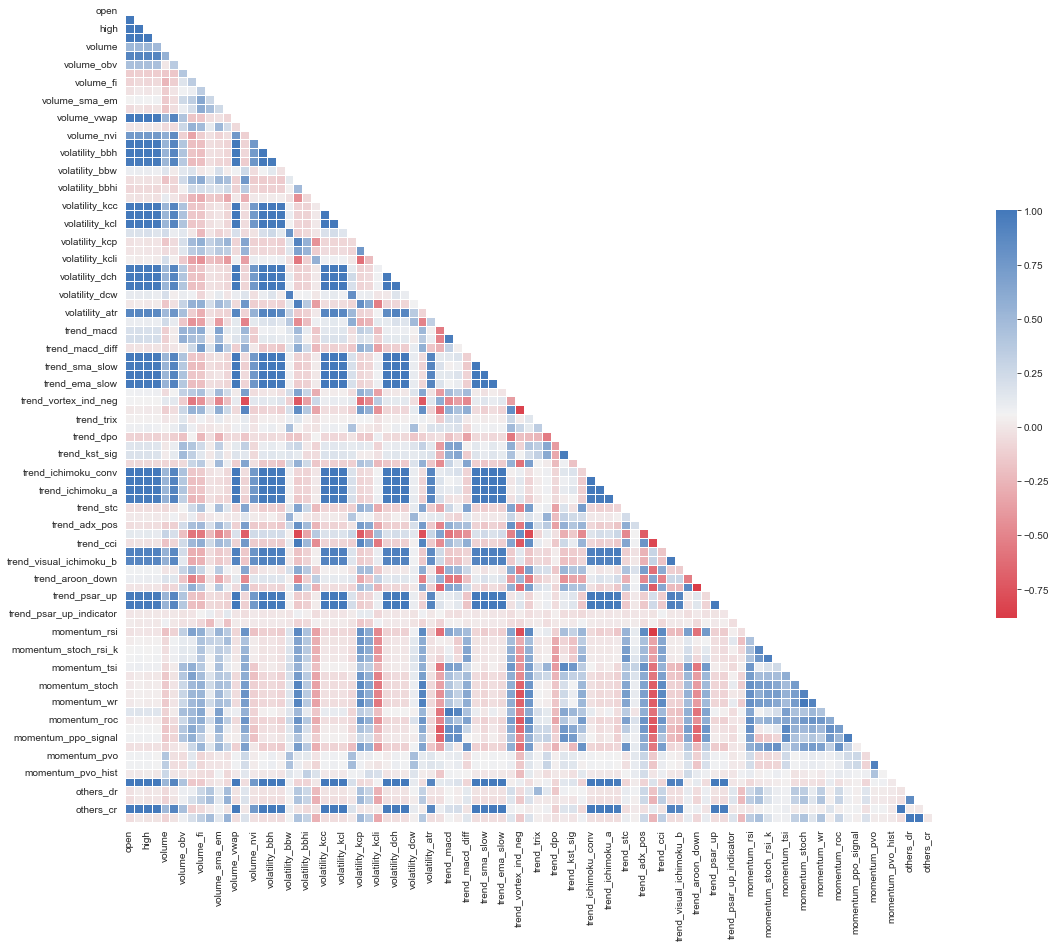

In [27]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [28]:
# # import pandas as pd
# # from sklearn.preprocessing import StandardScaler
#define columns to use for PCA
# X = df.drop(columns=["pct_change"])
pct_change = df.iloc[:,-1]
df = df.iloc[:,0:91]


#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=df.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [46]:
# from sklearn.decomposition import PCA
# pca.fit_transform(df)
#define PCA model to use
n_components = 10
pca = PCA(n_components=n_components)
#print(pca)

#fit PCA model to data
pcafit = pca.fit_transform(scaled_df) # choose 10 as component number and found 3 component is sufficient for the scree plot.
print(pcafit)




[[-6.13811519  6.04462746 -3.7361441  ... -0.72622925  7.74334808
   3.87941894]
 [-5.26529556  7.70413368 -2.93582965 ...  3.27636185 -0.35410897
  -2.47822976]
 [-6.20300676  3.77725751 -3.49778614 ...  1.94048945  0.09632086
  -3.05177171]
 ...
 [ 6.68583646  3.86102783  3.19028105 ...  0.11338444 -2.17835078
   0.29098767]
 [ 7.56836182  7.14699554  3.32111546 ...  1.13466619  0.43645017
   0.91806127]
 [ 7.39119175  7.01443922  2.6138123  ...  1.6333933   0.15730029
   0.17504493]]


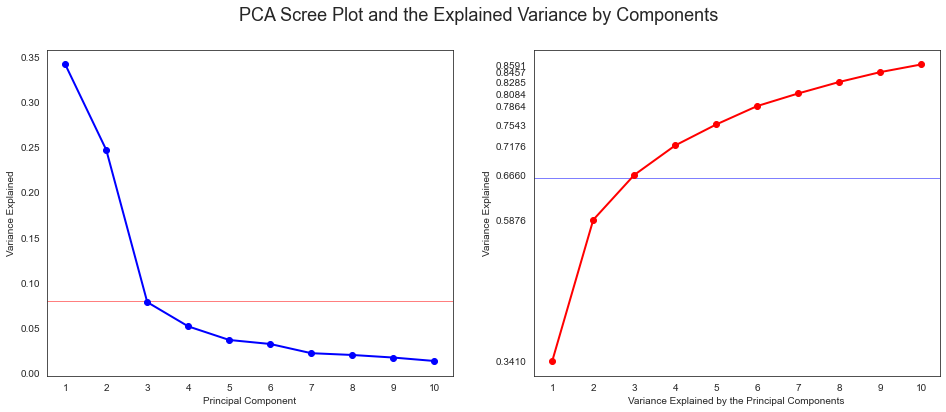

In [47]:
# import matplotlib.pyplot as plt
# import numpy as np

PC_values = np.arange(pca.n_components_) + 1

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (16,6))
fig.suptitle('PCA Scree Plot and the Explained Variance by Components',fontsize=18)
ax1.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
ax2.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2,color='red')
ax1.set_xlabel('Principal Component')
ax2.set_xlabel('Variance Explained by the Principal Components')
ax1.set_ylabel('Variance Explained')
ax2.set_ylabel('Variance Explained')
ax1.xaxis.set_ticks(PC_values)
ax2.xaxis.set_ticks(PC_values)
ax2.yaxis.set_ticks(np.cumsum(pca.explained_variance_ratio_))
ax1.axhline(y=0.08,xmin=0,xmax=3,c="red",linewidth=0.5,zorder=0)
ax2.axhline(y=0.66,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
plt.show()

In [33]:
pcas = [] 
for c_ in range(n_components):#MB_for automation, change to n_components
    pcas.append(f'PCA{c_+1}')
pca_df = pd.DataFrame(pcafit,columns=pcas,index=df.index)
pca_df['pct_change'] = pct_change
pca_df.dropna(inplace=True)

pca_df.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,pct_change
date,,,,,,,,,,,
1555286400,-5.265296,7.704134,-2.935814,8.731902,3.329564,9.108729,3.762362,3.286054,-0.350548,-2.476605,-0.020064
1555372800,-6.203007,3.777257,-3.497779,8.598133,2.906915,10.658660,3.831468,1.948142,0.101751,-3.063934,0.028485
1555459200,-6.233888,3.437225,-3.866672,8.429581,1.725941,11.012927,3.545433,1.885207,0.492826,-2.279946,0.004986
1555545600,-6.361877,2.843777,-3.692609,8.348872,2.235439,10.644254,3.772027,1.423469,0.503174,-2.888712,0.011597
1555632000,-6.281393,3.065239,-3.421675,8.230503,2.483883,10.322408,3.763072,1.408535,0.390537,-2.857927,0.000095
1555718400,-6.353534,2.711376,-3.473138,8.164396,2.288784,10.279862,3.711447,1.211330,0.349949,-2.933801,0.006045
1555804800,-6.205012,3.228838,-3.144780,7.999157,2.414774,9.906342,3.667628,1.235277,0.406381,-2.810848,-0.006405
1555891200,-6.514551,1.908218,-3.615004,7.657694,1.768489,10.404342,2.957629,1.183448,1.079809,-2.860546,0.018389
1555977600,-6.665159,1.139932,-3.850650,7.018482,1.923063,11.202919,1.295356,1.881185,1.904155,-2.778583,0.025975


In [34]:
pca_df = pca_df.to_numpy()
pca_df

array([[-5.26529552e+00,  7.70413361e+00, -2.93581405e+00, ...,
        -3.50547609e-01, -2.47660485e+00, -2.00635020e-02],
       [-6.20300673e+00,  3.77725730e+00, -3.49777946e+00, ...,
         1.01750861e-01, -3.06393401e+00,  2.84851015e-02],
       [-6.23388774e+00,  3.43722453e+00, -3.86667190e+00, ...,
         4.92826457e-01, -2.27994555e+00,  4.98647082e-03],
       ...,
       [ 6.68583638e+00,  3.86102767e+00,  3.19023097e+00, ...,
        -2.19251128e+00,  2.51198799e-01, -1.40620395e-02],
       [ 7.56836182e+00,  7.14699545e+00,  3.32112696e+00, ...,
         4.44493894e-01,  9.15497277e-01, -6.23858304e-02],
       [ 7.39119174e+00,  7.01443912e+00,  2.61381999e+00, ...,
         1.62127340e-01,  1.72738221e-01,  4.77955595e-03]])

In [38]:
pca_df.shape[1]

11

In [39]:
window = 5
dataset = windowed_dataset(pca_df,window,1,pca_df.shape[0])
for x,y in dataset:
    print(x.numpy(),y.numpy())
    
print(dataset)



[[[-4.83269319e+00 -7.56170006e-02  3.74145581e-01  1.35265623e+00
   -6.27734127e-01 -5.80140065e-01  2.39081944e-01 -9.90181105e-01
    1.26023584e-01 -1.62218470e-01  3.15030118e-03]
  [-4.77420009e+00  1.10561608e-01  7.68543835e-01  1.41915990e+00
   -6.16146771e-01 -2.58885940e-01  1.27866925e-01 -9.82111070e-01
    2.26060803e-01 -1.52909947e-01 -3.47797623e-04]
  [-4.85273741e+00 -1.17807653e-01  6.58923702e-01  1.47795976e+00
   -9.08086091e-01 -1.53148187e-02  8.06329628e-02 -8.91376355e-01
    2.22826944e-01 -3.04326524e-01  1.12050264e-02]
  [-3.93308382e+00  3.22100492e+00  2.63422455e+00  1.51667167e+00
    2.01298353e+00 -6.49289251e-01  2.64940044e-01 -1.13368660e-01
   -2.36478519e-01  4.00670043e-01 -6.08486222e-02]
  [-4.20613000e+00  2.61556466e+00  1.70295123e+00  1.50044621e+00
   -9.16834941e-01  9.83741656e-03 -2.70244951e-01  1.19920362e-02
   -1.94852258e-01 -3.74610591e-01  2.00418076e-02]]] [0.00068662]
[[[-2.39145177 -5.40812015  1.06416087 -0.70119836  1.7

[[[ 1.17663201e+01  5.00183505e+00  1.71625308e+00  9.01819822e-01
    9.58494125e-01  5.23583550e-01 -1.74679491e+00 -3.69554950e-01
    8.24903752e-01  2.47853097e-02 -4.01090190e-02]
  [ 1.13440990e+01  4.04348271e+00  4.77455021e-01  7.78688080e-01
   -1.48699227e+00  1.10254508e+00 -1.29212152e+00 -6.04282161e-01
    1.37760984e-01 -2.74082804e-01  2.30260058e-02]
  [ 1.11778422e+01  3.93212628e+00  3.45545069e-01  7.96610229e-01
   -1.30349004e+00  1.05437427e+00 -8.86014684e-01 -4.50770624e-01
   -5.84932465e-02 -7.71701784e-02 -7.00901283e-03]
  [ 1.06903186e+01  2.20114483e+00 -7.06948470e-01  8.93332012e-01
   -2.23358634e+00  1.61745549e+00 -6.88041046e-01 -2.42447971e-01
   -2.59936257e-02 -4.57054537e-01  3.17745625e-02]
  [ 1.16111132e+01  5.79677710e+00  1.26783394e+00  2.29687763e-01
    2.54612003e+00  5.30467394e-01 -1.27368526e+00 -8.56579504e-01
    1.17517660e+00  4.80065711e-01 -8.87003752e-02]]] [0.01845382]
[[[-4.54480345e+00  2.20580332e-01 -3.22002536e+00  5.6

[[[-2.13352867e+00 -5.08057875e+00  1.26386608e+00 -9.33741377e-01
    1.24965304e+00 -9.29136580e-01  8.33708516e-01  2.58409123e-01
    7.54363900e-01 -4.09318242e-01 -2.44571265e-02]
  [-2.22313792e+00 -5.45747855e+00  1.15267651e+00 -9.13269873e-01
    2.69507394e-01 -6.10577104e-01  8.69815524e-01 -3.95810223e-02
    7.00646946e-01 -9.48703578e-01  2.14758918e-02]
  [-2.43268075e+00 -6.88269517e+00  8.14799986e-01 -1.08574020e+00
   -2.80291865e-01 -1.49883618e-01  2.19632800e-01  3.24466136e-01
    9.92048107e-01 -1.22932076e+00  4.11764210e-02]
  [-2.49244754e+00 -8.21656534e+00  3.58292112e-01 -1.63348581e+00
   -9.55623403e-01  7.78109232e-02 -2.49605852e-02  1.12090230e+00
    7.16805455e-01 -1.56854524e+00  7.20533297e-02]
  [-2.05853293e+00 -7.51881290e+00  1.21049358e+00 -1.90022265e+00
    1.29607496e+00 -5.14478175e-02  2.25147249e-01  1.26731079e+00
    9.82762769e-01 -6.61256950e-01 -7.71702238e-03]]] [0.03017597]
[[[ 2.66274358e+00 -7.08307898e+00 -3.79405086e-01 -8.2

   -1.08968736e+00  1.27135758e-01  5.47610843e-02]]] [0.00123874]
[[[-4.25763568e+00  4.03131159e+00 -2.56855290e+00 -2.22715200e+00
   -1.39604279e+00  8.20476226e-02  7.26045640e-01  8.63739414e-01
    3.01639437e-01  1.02199909e+00  4.30745178e-02]
  [-4.20038697e+00  4.35310391e+00 -2.31884172e+00 -1.95019067e+00
    4.96778895e-02 -7.07410004e-01  1.53891437e+00  4.33494477e-01
    3.18188743e-01  1.50221801e+00 -2.51314718e-02]
  [-4.14839028e+00  4.67577884e+00 -2.19782375e+00 -1.81635183e+00
   -6.55044045e-02 -9.57564081e-01  1.58372820e+00  2.90623912e-01
    2.67778672e-01  1.40673277e+00 -2.03583925e-02]
  [-4.15057556e+00  4.78832704e+00 -2.01062526e+00 -1.57394634e+00
   -2.49435467e-01 -1.05513673e+00  1.39421449e+00  3.10777470e-01
   -1.76291378e-02  1.19401399e+00 -1.30560667e-02]
  [-4.22092544e+00  4.63115447e+00 -2.04363014e+00 -1.38235759e+00
   -5.01713409e-01 -1.02542275e+00  1.36516471e+00  3.76502549e-01
   -2.80707244e-01  9.00266184e-01 -3.83840322e-04]]] [

[[[ 6.93788660e+00  4.03363827e+00 -2.92633447e+00 -3.65647409e-01
    7.13529041e-01  1.11367451e-01 -3.74786880e-01 -3.74224793e-01
   -1.48825483e+00  2.81471738e-01 -3.06783949e-02]
  [ 6.66851071e+00  3.32343931e+00 -3.55435917e+00 -4.57437368e-01
   -3.47231064e-02 -1.64878073e-01 -4.24133192e-01 -5.10664790e-01
   -1.43385934e+00  6.05734714e-02  1.16914418e-02]
  [ 6.39801836e+00  2.93910278e+00 -4.08426298e+00 -8.14911891e-02
   -7.86726443e-01 -3.04515978e-01 -2.39934423e-01 -2.89565719e-01
   -1.63113882e+00  4.50821462e-01  1.55570468e-04]
  [ 6.26938538e+00  2.69142064e+00 -4.10658810e+00  1.32432401e-01
   -1.12951435e-01 -1.36536548e+00  1.59230387e-02 -6.96414035e-01
   -1.70857784e+00  2.19629496e-01 -3.25022055e-05]
  [ 6.34024074e+00  3.28479820e+00 -3.57654659e+00  4.09376005e-01
    7.01063789e-01 -1.64826882e+00  5.50239935e-02 -7.84747541e-01
   -1.85107880e+00  2.01117025e-01 -2.02077423e-02]]] [0.00348323]
[[[-3.93194073e+00  2.53911671e+00 -1.04789104e+00  2.9

[[[ 3.63040994  1.44078275 -3.74394009 -1.68687626 -1.37604874
    0.01964294  0.69224123 -0.10408459 -0.36068846 -0.48112032
    0.04111833]
  [ 3.61979555  1.57878333 -3.38108985 -1.45190305  0.20529157
   -0.77087278  1.40607972 -0.61633552 -0.02382721  0.09629322
   -0.02404696]
  [ 3.76678459  2.49468246 -2.7666884  -1.27554986  1.37131215
   -1.23658851  1.49269258 -0.95049192  0.07082524  0.14625297
   -0.04409423]
  [ 3.48807336  1.61714498 -3.15578665 -1.34166293 -0.09745699
   -1.62665401  1.01765658 -0.72886754 -0.30176376 -0.13754793
    0.0086955 ]
  [ 3.12395108  0.54331089 -3.74535362 -0.9761326  -0.88498479
   -1.42122737  1.14584685 -0.38270235 -0.52775602 -0.53519552
    0.02615458]]] [0.01726017]
[[[-6.09753403e+00 -2.08152003e+00 -2.57382423e+00 -2.53168095e-01
    1.58909662e+00 -2.48672555e-01  2.88180400e-01 -7.87932800e-01
    2.39979872e-01  3.04207670e-01 -1.79548400e-02]
  [-6.23155774e+00 -2.65679861e+00 -2.76614666e+00 -2.77282460e-02
    9.57660268e-01 -1.

[[[-4.11530491e+00 -7.32289748e+00  1.37077436e+00 -1.21574127e+00
   -6.09287503e-02 -8.52696323e-01 -1.59066541e-01 -1.71480323e+00
    1.14371671e+00 -9.24362046e-01  2.29375007e-03]
  [-3.80474162e+00 -6.23092155e+00  1.97877430e+00 -1.05894948e+00
    4.88350505e-01 -1.03273775e+00  1.09555528e-01 -1.79095204e+00
    1.26913357e+00 -8.73041707e-01 -1.52548898e-02]
  [-3.57437985e+00 -5.42570465e+00  2.32256099e+00 -8.66675361e-01
    2.00755784e-01 -1.04116673e+00  3.26938404e-01 -1.67665986e+00
    5.20444425e-01 -1.20089976e+00 -2.51399530e-03]
  [-3.74607757e+00 -6.57123008e+00  1.68425188e+00 -1.08251499e+00
   -6.71068466e-01 -2.08425834e-01 -7.12387932e-01 -1.09575722e+00
    8.98707830e-01 -1.26638841e+00  4.26006772e-02]
  [-3.32564544e+00 -5.01856744e+00  3.00591338e+00 -7.47287786e-01
    6.06800569e-01 -8.28022155e-01  2.28455513e-01 -1.43301081e+00
    1.79607527e-01 -1.09614746e+00 -2.24453355e-02]]] [-0.0841091]
[[[ 6.69300677e+00  6.81825850e-01  6.08256451e-03  1.0

In [103]:
# dataset_df = pd.DataFrame(dataset)
# dataset_df.head(10)
#type(dataset)

## Model creation

In [40]:
nn = Sequential([
    Dense(units=2*n_components*window, input_shape=[n_components*window], activation='relu'),
    Dense(units=int(1.5*n_components*window) ,activation='relu')
])



In [114]:
nn.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

nn.fit(dataset,epochs=100,verbose=0)

ValueError: in user code:

    File "C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\adele\anaconda3\envs\PythonData1\lib\site-packages\keras\engine\input_spec.py", line 249, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Exception encountered when calling layer "sequential_18" (type Sequential).
    
    Input 0 of layer "dense_36" is incompatible with the layer: expected axis -1 of input shape to have value 50, but received input with shape (None, None, 11)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, None, 11), dtype=float64)
      • training=True
      • mask=None
